<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/Fashion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

folder='/content/drive/MyDrive/fashion'

In [ ]:
folder = '/content/drive/MyDrive/fashion/'
photos,labels = list(),list()

for file in listdir(folder):
  output = 0.0

  if file.startswith('basic'):
    output = 1.0

  if file.startswith('prom'):
    output = 2.0

  if file.startswith('cllassic'):
    output = 3.0

  if file.startswith('sport'):
    output = 4.0
 
  if file.startswith('office'):
    output = 5.0

  photo = load_img(folder + file, target_size=(300,300))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/pic_train/fashion_photos.npy',photos)
save('/content/drive/MyDrive/pic_train/fashion_labels.npy',labels)

(1608, 300, 300, 3) (1608,)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

In [ ]:
photos = np.load('/content/drive/MyDrive/pic_train/fashion_photos.npy')
labels = np.load('/content/drive/MyDrive/pic_train/fashion_labels.npy')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1286, 300, 300, 3) (322, 300, 300, 3)
(1286,) (322,)


In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6)

print(y_train.shape,y_test.shape)

(1286, 6) (322, 6)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),
                 activation = 'relu', input_shape = (300,300,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_data = (x_test, y_test), verbose=1)

Epoch 1/100
11/11 [==============================] - 24s 619ms/step - loss: 4.0523 - accuracy: 0.1936 - val_loss: 1.6447 - val_accuracy: 0.1863
Epoch 2/100
11/11 [==============================] - 4s 369ms/step - loss: 1.5018 - accuracy: 0.3491 - val_loss: 1.3407 - val_accuracy: 0.5093
Epoch 3/100
11/11 [==============================] - 4s 353ms/step - loss: 1.2504 - accuracy: 0.4969 - val_loss: 1.4640 - val_accuracy: 0.3758
Epoch 4/100
11/11 [==============================] - 4s 367ms/step - loss: 0.9241 - accuracy: 0.6563 - val_loss: 0.9652 - val_accuracy: 0.6646
Epoch 5/100
11/11 [==============================] - 4s 355ms/step - loss: 0.6660 - accuracy: 0.7659 - val_loss: 0.8616 - val_accuracy: 0.7081
Epoch 6/100
11/11 [==============================] - 4s 392ms/step - loss: 0.5158 - accuracy: 0.8118 - val_loss: 0.7602 - val_accuracy: 0.7671
Epoch 7/100
11/11 [==============================] - 4s 369ms/step - loss: 0.3656 - accuracy: 0.8647 - val_loss: 0.6661 - val_accuracy: 0.813

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/fashion.h5')

In [ ]:
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/fashion.h5')

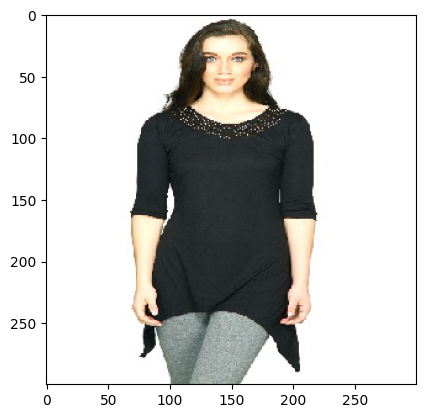

so: [0. 0. 1. 0. 0. 0.]


In [ ]:
digit = x_test[22]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[22])

In [ ]:
classes = ['none','basic', 'prom', 'cllassic', 'sport', 'office']
img = x_test[22]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))

1/1 [==============================] - 1s 867ms/step
predict:  prom [7.1632815e-17 3.0324227e-14 9.9891126e-01 2.9011879e-19 1.3849583e-15
 1.0887930e-03]


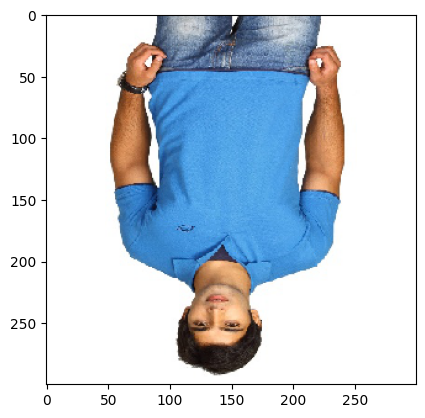

so: [0. 1. 0. 0. 0. 0.]


In [ ]:
digit = x_test[111]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[111])

In [ ]:
classes = ['none','basic', 'prom', 'cllassic', 'sport', 'office']
img = x_test[111]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])])
# print("predict: ",classes[np.argmax(res[0])],(res[0]))

1/1 [==============================] - 0s 24ms/step
predict:  basic
